# Uczenie maszynowe
Notatnik do wykładu 1 
  
dr inż. Mateusz Gorczyca

# Uczenie nadzorowane - klasyfikacja

## Dane uczące - wczytanie i struktura

Wczytanie danych - zbiór [Iris](https://www.kaggle.com/datasets/uciml/iris) (Kosaciec):

In [39]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)

Zawartość obiektu danych:

In [40]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

Opis danych:

In [41]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Dane w postaci ramki danych Pandas:

In [42]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[Graficzne wyjaśnienie znaczenia cech](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

- Ramka danych (tabela) `data.frame` zawiera zbiór *przykładów uczących* (*obserwacji*). 
- Każdy wiersz zawiera pojedynczy przykład. 
- Kolumna docelowa `target` zawiera *etykietę danych* (*klasę*), niezbędną przy uczeniu nadzorowanym.  
- Pozostałe kolumny (`sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)`) zawierają *cechy* przykładów uczących.

Nazwy gatunków:

In [43]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Zmiana zawartości kolumny `target` z numeru klasy na nazwę gatunku:

In [44]:
data.frame['target'] = data.target_names[data.frame['target']]
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Numer klasy wciąż jest dostępny w polu `target` danych:

In [45]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

Wartości cech są także dostępne w polu `data`:

In [46]:
data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Wstępne oględziny danych

Zliczenie przykładów należących do każdej klasy.

In [47]:
data.frame['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

Wizualizacja za pomocą [matplotlib](https://matplotlib.org/) - wyświetlenie klasy dla 2 wybranych cech (`petal length (cm)` i `petal width (cm)`):

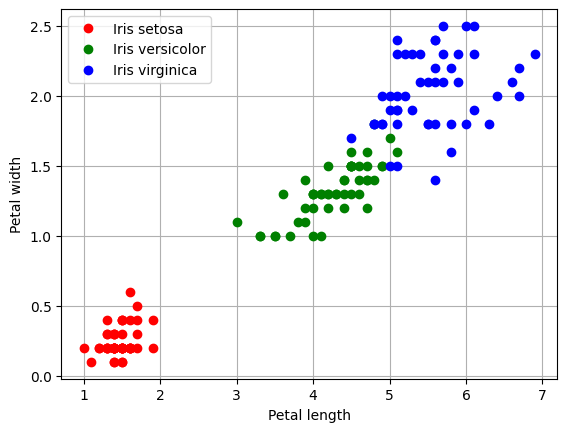

In [49]:
import matplotlib.pyplot as plt

plt.plot(data.frame.loc[data.frame.target=='setosa', 'petal length (cm)'], 
         data.frame.loc[data.frame.target=='setosa', 'petal width (cm)'], 
         'ro', label="Iris setosa")
plt.plot(data.frame.loc[data.frame.target=='versicolor', 'petal length (cm)'], 
         data.frame.loc[data.frame.target=='versicolor', 'petal width (cm)'],
         'go', label="Iris versicolor")
plt.plot(data.frame.loc[data.frame.target=='virginica', 'petal length (cm)'], 
         data.frame.loc[data.frame.target=='virginica', 'petal width (cm)'], 
         'bo', label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

## Podział danych na zbiór treningowy i testowy

Zapisanie cech i celu w konwencji uczenia maszynowego:

In [50]:
X = data.data
y = data.target

Podział zbioru danych na przykłady treningowe i testowe:

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Klasyfikacja (za pomocą klasyfikatora drzewiastego)

Tworzony jest obiekt klasyfikatora (tutaj klasyfikator drzewiasty), a następnie model jest trenowany za pomocą metody `fit` na danych treningowych:

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Wytrenowany model może przewidywać klasę dla podanego przykładu przez wywołanie metody `predict`. Poniżej model przewiduje, do jakiej klasy należy przykład, w którym: 
- sepal length = 5 (cm),  
- sepal width = 3 (cm),  
- petal length = 2 (cm),  
- petal width = 0,5 (cm)  

In [57]:
clf.predict([[5.0, 3.0, 2.0, 0.5]])

C:\Users\Mateusz\Documents\Python365MLvenv\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Powyżej traktujemy model klasyfikatora jak "czarną skrzynkę". Możemy oczywiście zajrzeć do jego wnętrza:

[Text(0.4, 0.9, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'X[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

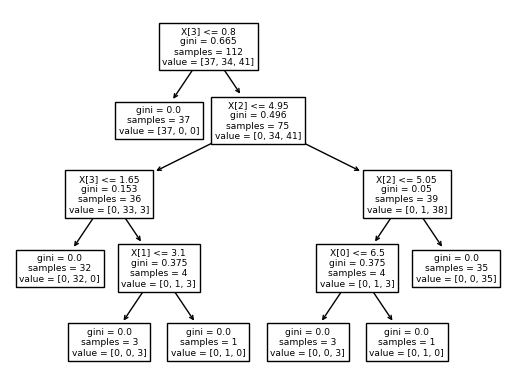

In [58]:
from sklearn.tree import plot_tree

plot_tree(clf)

Aby ocenić jakość uzyskanego modelu, należy zmierzyć jego efektywność na danych, których jeszcze "nie widział" - danych testowych. Poniżej pomiar dokładności (*accuracy*), czyli częstości poprawnie odgadniętych klas w zbiorze testowym:

In [59]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

## Regresja (liniowa)

Wczytanie zbioru danych pacjentów z cukrzycą:

In [60]:
from sklearn.datasets import load_diabetes 

data = load_diabetes(as_frame=True)

Opis danych:

In [61]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Wykres wskaźnika BMI (wartość ustandaryzowana) i wartości docelowej (miara postępu choroby w ciągu roku od badania):

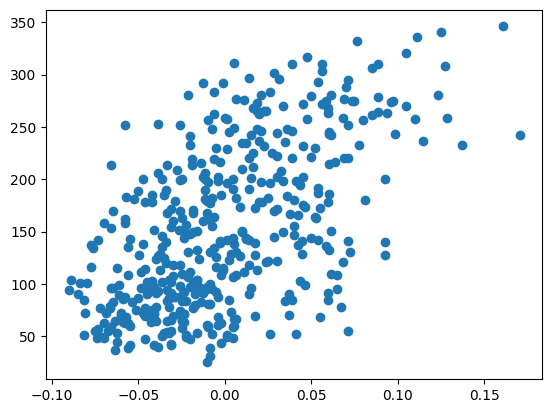

In [62]:
plt.scatter(data.frame['bmi'], data.frame['target'])

Zapisanie cech i celu w konwencji uczenia maszynowego:

In [63]:
X = data.frame[['bmi']].values
y = data.frame['target'].values

Podział zbioru danych na przykłady treningowe i testowe:

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Uczenie modelu regresji liniowej na danych treningowych - wykorzystanie metody `fit` obiektu `LinearRegression`:

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Narysowanie wyuczonego modelu dla danych testowych:

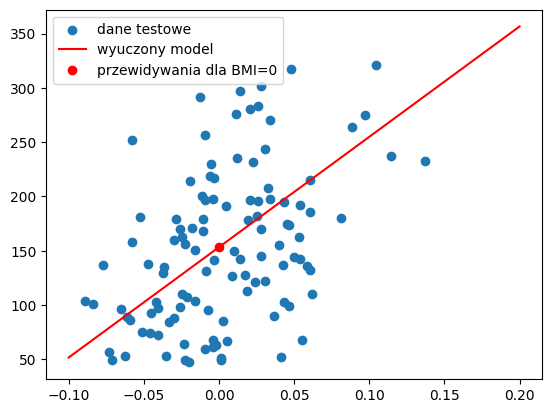

In [66]:
plt.scatter(X_test, y_test, label='dane testowe')
a, b = -0.1, 0.2
plt.plot([a,b],model.predict([[a],[b]]), 'r', label='wyuczony model')
plt.plot([0],model.predict([[0]]), 'ro', label='przewidywania dla BMI=0')
plt.legend()

Aby ocenić jakość uzyskanego modelu, należy zmierzyć jego efektywność na danych, których jeszcze "nie widział" - danych testowych. Poniżej pomiar średniego błędu bezwzględnego (*mean absolute error*) dla zbioru testowego:

In [34]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

53.33987957460229